In [101]:
import pandas as pd

In [102]:
df = pd.read_csv("C:/Users/MyPc/Desktop/SistersLab/HepatitisCdata.csv")
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [103]:
df.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [104]:
data = df.drop(columns="Unnamed: 0")

In [106]:
print(data.isnull().sum())

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64


In [115]:
numeric_columns = data.select_dtypes(include=[float]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [116]:
print(data.isnull().sum())

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [117]:
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [118]:
print(data.dtypes)

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object


In [131]:
import numpy as np
import matplotlib.pyplot as pyt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [121]:
data.columns

Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

# NORMALIZE DATA WITH STANDART SCALER

In [122]:
# "Sex" sütununu One-Hot Encoding uygula
new_data = pd.get_dummies(data, columns=['Sex'])

In [123]:
X = new_data.drop("Category", axis=1)  # Tahmin edilecek değer hariç tüm özellikler
y = new_data["Category"]  # Tahmin edilecek değer


In [124]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (492, 13) (492,)
Test set: (123, 13) (123,)


# KNN model

In [126]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [127]:
y_hat = knn.predict(X_test)

In [128]:
from sklearn import metrics
print("Train set accuracy:", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set accuracy:", metrics.accuracy_score(y_test, y_hat))


Train set accuracy: 0.9410569105691057
Test set accuracy: 0.8861788617886179


In [129]:
# chack other K values
Ks = 10

mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    # every k value
    knn = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_hat = knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)
    std_acc[n-1] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

In [ ]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

In [130]:
mean_acc

array([0.90243902, 0.88617886, 0.88617886, 0.87804878, 0.89430894,
       0.8699187 , 0.8699187 , 0.8699187 , 0.8699187 ])

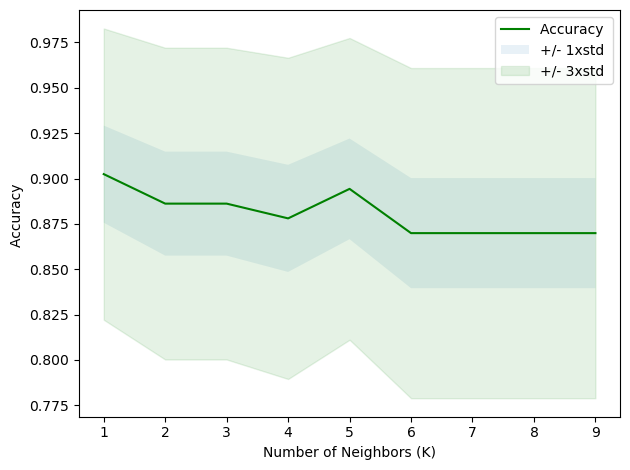

In [133]:
import matplotlib.pyplot as plt


plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [134]:
k = 1

neigh1 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat1 = neigh1.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh1.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat1))

Train set Accuracy:  1.0
Test set Accuracy:  0.9024390243902439


In [135]:
k = 5

neigh5 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat5 = neigh5.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh5.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat5))

Train set Accuracy:  0.9247967479674797
Test set Accuracy:  0.8943089430894309


# Evaluation metrics applicable to KNN

Jaccard İndeksi:

Jaccard İndeksi, iki küme arasındaki benzerliği ölçen bir metriktir.
KNN'nin sınıflandırma görevlerinde, Jaccard İndeksi, gerçek ve tahmin edilen sınıflar arasındaki ortak örneklerin toplam örnek sayısına oranını ifade eder.

Log Kaybı, sınıflandırma modellerinin tahminlerinin olasılık dağılımlarını değerlendiren bir ölçüdür.
KNN için kullanılacaksa, modelin öngördüğü sınıf olasılıklarıyla gerçek sınıf etiketlerini karşılaştırarak bir değerlendirme sağlar.
Düşük log kaybı, modelin daha iyi performans gösterdiğinin göstergesidir.

F1 Skoru, belli ölçütleri birleştirerek modelin performansını değerlendirir.
KNN sınıflandırma problemlerinde, F1 skoru, doğru pozitif (TP), yanlış pozitif (FP) ve yanlış negatif (FN) örnek sayılarına dayanarak hesaplanır.